# Importing Libraries 

In [29]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [30]:
import pandas as pd 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

# Loading dataset

In [31]:
df= pd.read_csv('sentiment_tweets3.csv')

In [32]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [33]:
df.tail()

,Index,message to examine,label (depression result)
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1
10313,802313,0,1


In [34]:
df.shape

(10314, 3)

In [35]:
df.dtypes

Index                         int64
message to examine           object
label (depression result)     int64
dtype: object

In [36]:
df.describe

<bound method NDFrame.describe of         Index                                 message to examine  \
0         106  just had a real good moment. i missssssssss hi...   
1         217         is reading manga  http://plurk.com/p/mzp1e   
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...   
3         288  @lapcat Need to send 'em to my accountant tomo...   
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder   
...       ...                                                ...   
10309  802309  No Depression by G Herbo is my mood from now o...   
10310  802310  What do you do when depression succumbs the br...   
10311  802311  Ketamine Nasal Spray Shows Promise Against Dep...   
10312  802312  dont mistake a bad day with depression! everyo...   
10313  802313                                                  0   

       label (depression result)  
0                              0  
1                              0  
2                              0  
3        

## Dropping index

In [37]:
df.drop('Index', axis=1, inplace = True)

## Generating wordcloud

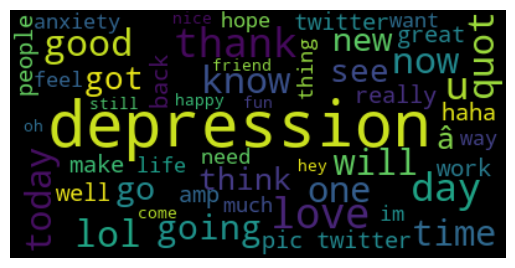

In [38]:
text = ' '.join(df['message to examine'])
wordcloud = WordCloud(max_words=50).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='label (depression result)'>

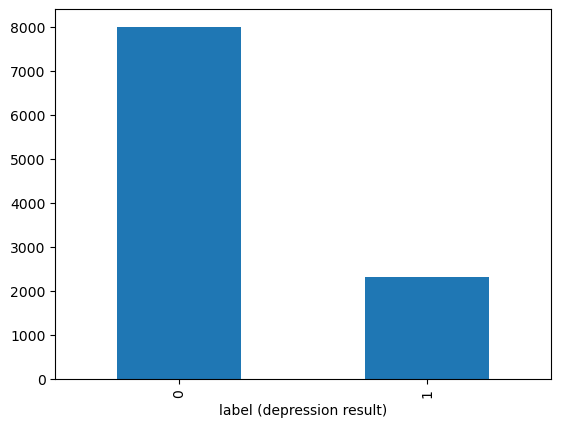

In [39]:
df.groupby('label (depression result)').size().plot(kind='bar')

In [40]:
# For first 10 rows

for i in range(10):
    print(df['message to examine'][i], "\n")

just had a real good moment. i missssssssss him so much,  

is reading manga  http://plurk.com/p/mzp1e 

@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8  

@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.  

ADD ME ON MYSPACE!!!  myspace.com/LookThunder 

so sleepy. good times tonight though  

@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now  

23 or 24ï¿½C possible today. Nice  

nite twitterville  workout in the am  -ciao 

@daNanner Night, darlin'!  Sweet dreams to you  



## Normalizing text

In [41]:
 df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['clean_message'] = df['message to examine'].apply(lambda x: re.sub(r'http\S+', ' ', x))

df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,0,is reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


## Removing stopwords

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/e8e42a42-e1e1-4631-a378-
[nltk_data]     6aaf03fe59ed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = set(stopwords.words('english'))
df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [44]:
df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder


In [25]:
df['clean_message'] = df['clean_message'].str.lower()
df.head()

,message to examine,label (depression result),clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add me on myspace!!! myspace.com/lookthunder


## Tokenizing words

In [46]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/e8e42a42-e1e1-4631-a378-
[nltk_data]     6aaf03fe59ed/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
df['tokenized_clean_message'] = df['clean_message'].apply(word_tokenize)
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...,"[@, lapcat, Need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,"[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo..."


## Lemmatizing words

In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/e8e42a42-e1e1-4631-a378-
[nltk_data]     6aaf03fe59ed/nltk_data...


True

In [51]:
lemmatizer = WordNetLemmatizer()

df['lemmatized_tokenized_clean_message'] = df['tokenized_clean_message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]"
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]"
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...,"[@, lapcat, Need, send, 'em, accountant, tomor...","[@, lapcat, Need, send, 'em, accountant, tomor..."
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,"[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...","[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo..."


In [52]:
df['lemmatized_text'] = df['lemmatized_tokenized_clean_message'].apply(lambda x: ' '.join(x))
df.head()

,message to examine,label (depression result),clean_message,tokenized_clean_message,lemmatized_tokenized_clean_message,lemmatized_text
0,just had a real good moment. i missssssssss hi...,0,"real good moment. missssssssss much,","[real, good, moment, ., missssssssss, much, ,]","[real, good, moment, ., miss, much, ,]","real good moment . miss much ,"
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga,"[reading, manga]","[reading, manga]",reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen -,"[@, comeagainjen, -]","[@, comeagainjen, -]",@ comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need send 'em accountant tomorrow. Odd...,"[@, lapcat, Need, send, 'em, accountant, tomor...","[@, lapcat, Need, send, 'em, accountant, tomor...",@ lapcat Need send 'em accountant tomorrow . O...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,"[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...","[ADD, ME, ON, MYSPACE, !, !, !, myspace.com/Lo...",ADD ME ON MYSPACE ! ! ! myspace.com/LookThunder


## Importing Libraries for Machine Learning Algorithms

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix

## Train-Test Splitting

In [55]:
X = df["lemmatized_text"]
y = df["label (depression result)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()
decision_tree = DecisionTreeClassifier()
support_vector_machine = SVC()


## Logistic Regression

In [56]:
lr = Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracylr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracylr)

Logistic Regression Accuracy: 0.9893410852713178


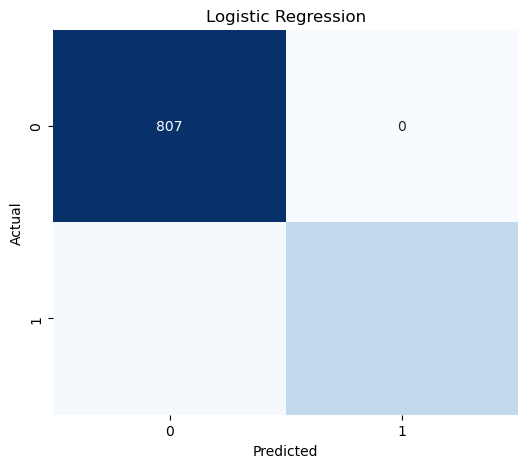

In [67]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot the confusion matrix for Logistic Regression
plot_confusion_matrix(cm_lr, 'Logistic Regression')

## Naive Bayes

In [57]:
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracynb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracynb)

Naive Bayes Accuracy: 0.9098837209302325


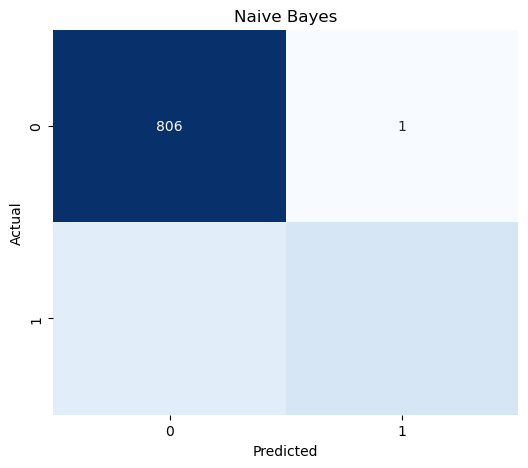

In [68]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_nb, 'Naive Bayes')

## Decision Tree

In [58]:
dt = Pipeline([("tfidf", tfidf), ("decision_tree", decision_tree)])
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracydt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracydt)

Decision Tree Accuracy: 0.9563953488372093


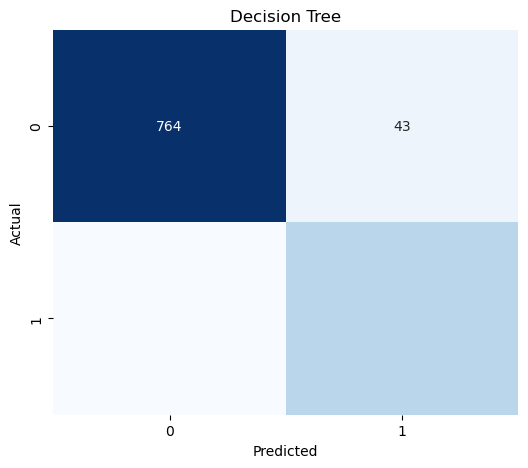

In [69]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_dt, 'Decision Tree')

## Support Vector Machine

In [60]:
svm = Pipeline([("tfidf", tfidf), ("support_vector_machine", support_vector_machine)])
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracysvm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracysvm)

SVM Accuracy: 0.9961240310077519


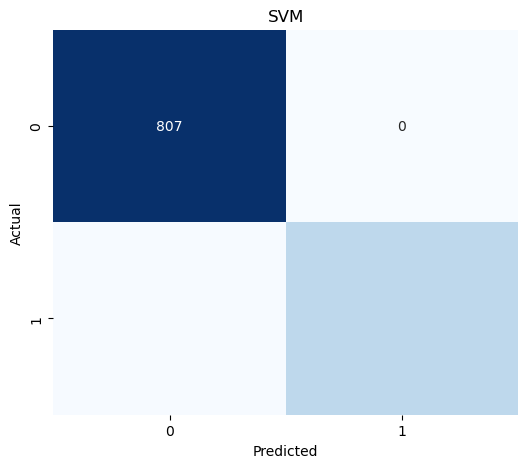

In [70]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
plot_confusion_matrix(cm_svm, 'SVM')

In [72]:
models = ["Logistic Regression", "Naive Bayes", "Decision Tree", "SVM"]
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for model, y_pred in zip([lr, nb, dt, svm], [y_pred_lr, y_pred_nb, y_pred_dt, y_pred_svm]):
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
 
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
        
    roc_aucs.append(roc_auc_score(y_test, y_pred_proba))

metrics_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1-score": f1_scores,
    "ROC-AUC": roc_aucs
})

metrics_df.head()

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.989341,0.989484,0.989341,0.989244,0.996641
1,Naive Bayes,0.909884,0.918260,0.909884,0.900867,0.974429
2,Decision Tree,0.956395,0.962714,0.956395,0.957648,0.968914
3,SVM,0.996124,0.996143,0.996124,0.996111,0.995534


## Results

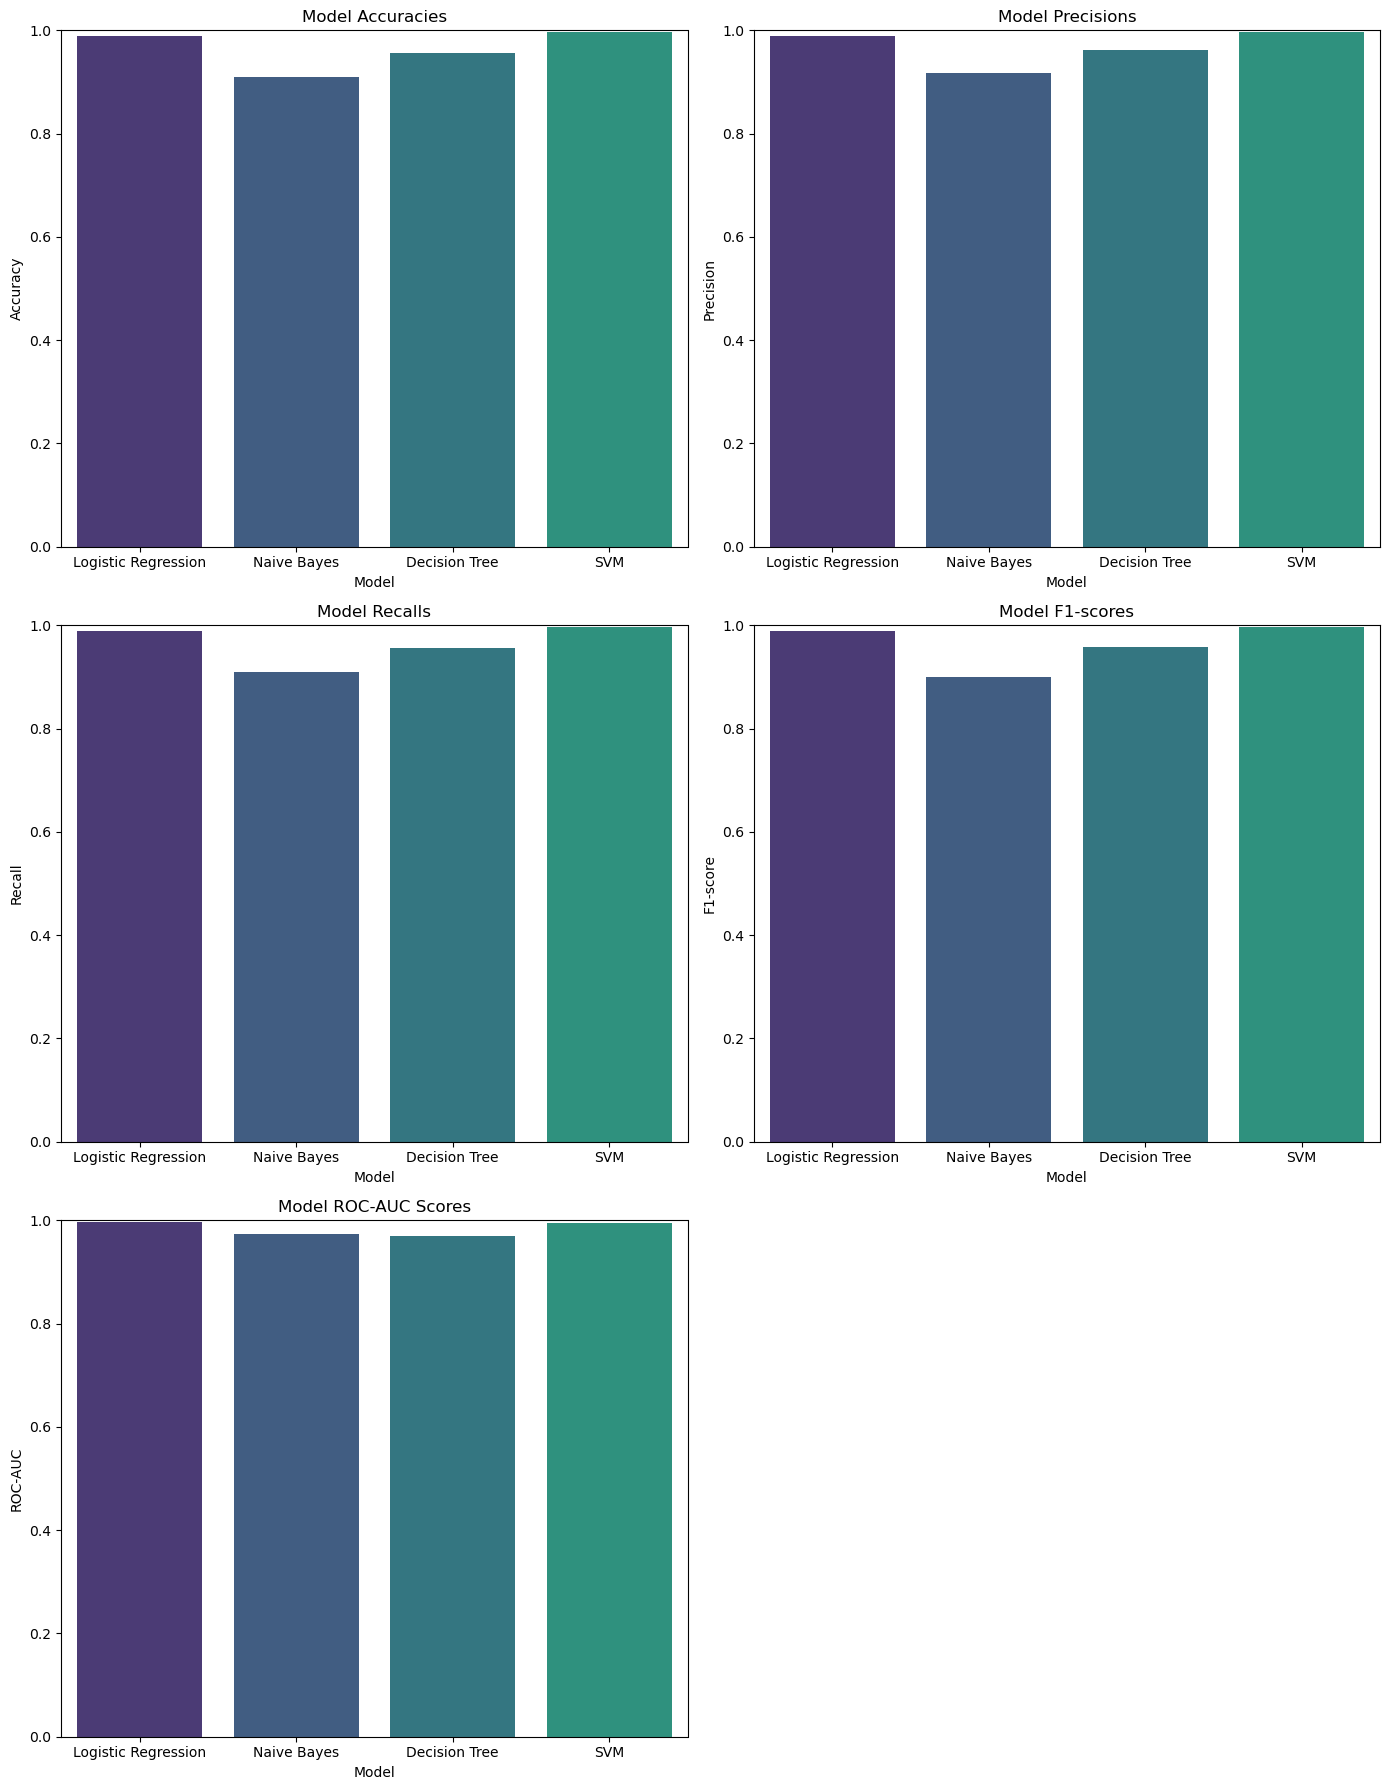

In [81]:

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
palette = sns.color_palette("viridis")

sns.barplot(x="Model", y="Accuracy", data=metrics_df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracies")
axes[0, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="Precision", data=metrics_df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title("Model Precisions")
axes[0, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="Recall", data=metrics_df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title("Model Recalls")
axes[1, 0].set_ylim(0, 1)

sns.barplot(x="Model", y="F1-score", data=metrics_df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title("Model F1-scores")
axes[1, 1].set_ylim(0, 1)

sns.barplot(x="Model", y="ROC-AUC", data=metrics_df, palette=palette, ax=axes[2, 0])
axes[2, 0].set_title("Model ROC-AUC Scores")
axes[2, 0].set_ylim(0, 1)


fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


## Plotting ROC

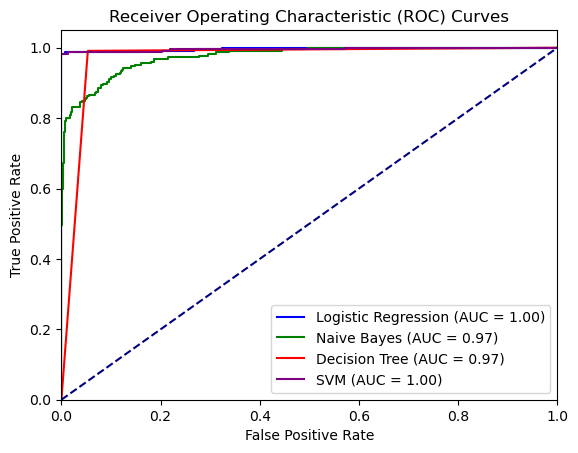

In [76]:

colors = ['blue', 'green', 'red', 'purple']

for model, label, color in zip([lr, nb, dt, svm], models, colors):
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

plt.show()


## Summary of findings

In this analysis, four models were used to detect depression people using sentimental tweets: Logistic Regression, Naive Bayes, Decision Tree and Support Vector Machine. The purpose of this analysis was to check the best fit model using various performance metrics.

## Model Performance Matrix

In [85]:
print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.989341   0.989484  0.989341  0.989244  0.996641
1          Naive Bayes  0.909884   0.918260  0.909884  0.900867  0.974429
2        Decision Tree  0.956395   0.962714  0.956395  0.957648  0.968914
3                  SVM  0.996124   0.996143  0.996124  0.996111  0.995534


## Important Findings

- Best performing Model: SVM model acheived the highest scores across most of the metrics, including Accuracy, Precision, Recall, F1 Score, indicating that it is the most effective model for detecting depression using tweets.
- Logistic Regression: This model provided good accuracy in comparison to rest of the models (Naive Bayes and Decision tree) and is very close to SVM.   
- Naive Bayes: This model has the lowest accuracy, precision and recall across all the models.
-Decision Tree:  This model has good performance as compared to Naive Bayes but has slightly low accuracy as compared to SVM and Logistic Regression.                                                                                                                                                                                        